In [2]:
# imports

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score, precision_score, f1_score, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImPipeline

In [3]:
# importing 'testing' data
test_vals = pd.read_csv('../data/test_vals.csv')

In [4]:
# exploring 'testing' data
test_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [5]:
# importing training data
training_labels = pd.read_csv('../data/training_labels.csv')

In [6]:
# exploring training target data
training_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [7]:
# importing training features data
training_vals = pd.read_csv('../data/training_vals.csv')

In [8]:
#exploring training features data
training_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [9]:
# merging target and features of training data into one dataframe
data = pd.merge(training_vals, training_labels)

In [10]:
# exploring new dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [11]:
# exploring nulls
data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [12]:
# exploring unique values 'scheme_name'
data['scheme_name'].value_counts()

K                                 682
None                              644
Borehole                          546
Chalinze wate                     405
M                                 400
                                 ... 
Wisu                                1
Lu                                  1
Losaa kia gravity water supply      1
BL Losei                            1
KKKT Water Project                  1
Name: scheme_name, Length: 2696, dtype: int64

In [13]:
# exploring number of unique values in 'scheme_name'
len(data['scheme_name'].unique())

2697

In [14]:
# exploring unique values 'scheme_management'
data['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [15]:
# exploring columns with 10 or less unique values for potentially OHE
col_less_10 = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        col_less_10.append(column)

print(col_less_10)
len(col_less_10)

['basin', 'public_meeting', 'recorded_by', 'permit', 'extraction_type_class', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


18

### Exploring unique values in each column

In [16]:
data['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [17]:
data['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [18]:
data['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [19]:
data['ward'].value_counts()

Igosi              307
Imalinyi           252
Siha Kati          232
Mdandu             231
Nduruma            217
                  ... 
Izia                 1
Kihangimahuka        1
Kapilula             1
Ifinga               1
Uwanja wa Ndege      1
Name: ward, Length: 2092, dtype: int64

In [20]:
data['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [21]:
data['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [22]:
data['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [23]:
data['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [24]:
data['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [25]:
data['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [26]:
data['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [27]:
data['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [28]:
data['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [29]:
data['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [30]:
data['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [31]:
data['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [32]:
data['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [33]:
data['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [34]:
data['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [35]:
data['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [36]:
data['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [37]:
data['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

### Making a list of all the columns that are either redundant or not useful to model

In [38]:
drop_cols_list = ['id','date_recorded', 'latitude', 'longitude', 'wpt_name', 'num_private', 'region_code', 'district_code', 'lga', 'ward', 'subvillage', 'public_meeting', 'recorded_by', 'extraction_type', 'extraction_type_group', 'management_group', 'payment_type', 'water_quality', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type']

In [39]:
len(drop_cols_list)

22

In [40]:
# creating dataframe without columns mentioned above
df1 = data.drop(drop_cols_list, axis=1)

In [41]:
df1.head()

,amount_tsh,funder,gps_height,installer,basin,region,population,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management,payment,quality_group,quantity,source,waterpoint_type_group,status_group
0,6000.0,Roman,1390,Roman,Lake Nyasa,Iringa,109,VWC,Roman,False,1999,gravity,vwc,pay annually,good,enough,spring,communal standpipe,functional
1,0.0,Grumeti,1399,GRUMETI,Lake Victoria,Mara,280,Other,NaN,True,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,Lottery Club,686,World vision,Pangani,Manyara,250,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,vwc,pay per bucket,good,enough,dam,communal standpipe,functional
3,0.0,Unicef,263,UNICEF,Ruvuma / Southern Coast,Mtwara,58,VWC,NaN,True,1986,submersible,vwc,never pay,good,dry,machine dbh,communal standpipe,non functional
4,0.0,Action In A,0,Artisan,Lake Victoria,Kagera,0,NaN,NaN,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional


In [42]:
df1.shape

(59400, 19)

### Dealing with nulls and missing values and creating different iterations of the dataset based on this

In [43]:
# creating dataframe 'df2' with no nulls
df2 = df1.dropna()
df2.shape

(28986, 19)

In [44]:
# creating dataframe 'df3' which removes all rows with '0' in 'construction_year' column
df3 = df2.drop(df2.loc[df2['construction_year']==0].index)

In [45]:
df3.shape

(22710, 19)

In [46]:
# renaming dataset
data_all = df3

In [47]:
# checking class imbalance
df3['status_group'].value_counts()

functional                 13737
non functional              7295
functional needs repair     1678
Name: status_group, dtype: int64

### Creating dataset without 'scheme_name' column to allow for all data (minus nulls and '0's)

In [48]:
# creating dataframe 'df4' which drops column 'scheme_name'
df4 = df1.drop('scheme_name', axis=1)
df4.shape

(59400, 18)

In [49]:
# creating dataframe 'df5' without 'scheme_name' and dropping nulls
df5 = df4.dropna()
df5.shape

(51281, 18)

In [50]:
# creating dataframe 'data6' without 'scheme_name' column and removed all rows with '0' in 'contruction_year' column
df6 = df5.drop(df5.loc[df5['construction_year']==0].index)
df6.shape

(34298, 18)

In [51]:
# renaming dataframe
data_no_sname = df6

In [52]:
df6['status_group'].value_counts()

functional                 19552
non functional             12478
functional needs repair     2268
Name: status_group, dtype: int64

### Creating dataset without 'contruction_year' column to allow for all data (minus nulls)

In [53]:
# creating dataframe 'df4' which drops column 'construction year'
df7 = df1.drop('construction_year', axis=1)
df7.shape

(59400, 18)

In [54]:
# creating dataframe 'data5' without 'construction_year' and dropping nulls
df8 = df7.dropna()
df8.shape

(28986, 18)

In [55]:
# renaming dataframe
data_no_constr = df8

In [56]:
df8['status_group'].value_counts()

functional                 16579
non functional             10335
functional needs repair     2072
Name: status_group, dtype: int64

### Creating dataset without 'scheme_name' or 'construction_year' columns (minus nulls)

In [57]:
df9 = df1.drop(['scheme_name', 'construction_year'], axis=1)
df9.shape

(59400, 17)

In [58]:
df10 = df9.dropna()
df10.shape

(51281, 17)

In [59]:
# renaming dataframe
data_no_sname_no_constr = df10

In [60]:
df10['status_group'].value_counts()

functional                 28047
non functional             19610
functional needs repair     3624
Name: status_group, dtype: int64

### Creating training and testing data for each dataframe ('all columns', 'no_scheme_name', 'no_contruction', no_scheme_name_or_construction')

In [61]:
df_list = {'data_all': data_all, 'data_no_sname': data_no_sname, 'data_no_constr': data_no_constr, 'data_no_sname_no_constr': data_no_sname_no_constr}
df_dic = {}

for key, value in df_list.items():
    X = value.drop('status_group', axis=1)
    y = value['status_group']
    z = key
    df_dic["X_train_" + z], df_dic["X_test_" + z], df_dic["y_train_" + z], df_dic["y_test_" + z] = train_test_split(X, y)

In [62]:
df_dic.keys()

dict_keys(['X_train_data_all', 'X_test_data_all', 'y_train_data_all', 'y_test_data_all', 'X_train_data_no_sname', 'X_test_data_no_sname', 'y_train_data_no_sname', 'y_test_data_no_sname', 'X_train_data_no_constr', 'X_test_data_no_constr', 'y_train_data_no_constr', 'y_test_data_no_constr', 'X_train_data_no_sname_no_constr', 'X_test_data_no_sname_no_constr', 'y_train_data_no_sname_no_constr', 'y_test_data_no_sname_no_constr'])

### Creating subpipelines for models

In [63]:
def grab_numeric(df):
    df = pd.DataFrame(df)
    return df.select_dtypes(include=['float', 'int'])

In [64]:
GrabNum = FunctionTransformer(grab_numeric)

In [65]:
subpipe_num = Pipeline(steps=[('grab_num', GrabNum), ('scaler', StandardScaler())])

In [66]:
def grab_categorical(df):
    df = pd.DataFrame(df)
    return df.select_dtypes(include=['object'])

In [67]:
GrabCat = FunctionTransformer(grab_categorical)

In [69]:
subpipe_cat = Pipeline(steps=[('grab_cat', GrabCat), ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [70]:
col_trans = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, X.columns), ('subpipe_cat', subpipe_cat, X.columns)])

### Logistic Regression Model

In [122]:
logreg_pipe = Pipeline(steps=[('col_trans', col_trans), ('logreg', LogisticRegression(max_iter=1000))])

In [123]:
logreg_pipe.fit(df_dic['X_train_data_all'], df_dic['y_train_data_all'])

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('grab_num',
                                                                   FunctionTransformer(func=<function grab_numeric at 0x7fa366ed3700>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
       'population', 'scheme_management', 'permit', 'extraction_type_class',
       'management',...
                                                                   FunctionTransformer(func=<function grab_categorical at 0x7fa366ec4280>)),
                                                                  ('ohe',
                                                                   OneHotEncoder(

### K-Nearest Neighbors Model

In [88]:
knn_pipe = Pipeline(steps=[('col_trans', col_trans), ('knn', KNeighborsClassifier())])

In [89]:
knn_pipe.fit(df_dic['X_train_data_all'], df_dic['y_train_data_all'])

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('grab_num',
                                                                   FunctionTransformer(func=<function grab_numeric at 0x7f86d0a143a0>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
       'population', 'scheme_management', 'permit', 'extraction_type_class',
       'management',...
                                                                   FunctionTransformer(func=<function grab_categorical at 0x7f86d0a14d30>)),
                                                                  ('ohe',
                                                                   OneHotEncoder(

#### Grid Search # 1

In [90]:
params1 = {}
params1['knn__n_neighbors'] = [3, 5, 7, 11]
params1['knn__weights'] = ['uniform', 'distance']
params1['knn__p'] = [1, 2]

grid1 = GridSearchCV(knn_pipe, param_grid=params1, scoring='recall_weighted', cv=3, n_jobs=-3, verbose=3)

grid1.fit(df_dic['X_train_data_all'], df_dic['y_train_data_all'])

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-3)]: Done  48 out of  48 | elapsed:  7.6min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('grab_num',
                                                                                          FunctionTransformer(func=<function grab_numeric at 0x7f86d0a143a0>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
       'population', 'scheme_management', 'permit', 'extracti...
                                                                         Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
  

In [91]:
grid1.best_params_

{'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'distance'}

In [92]:
grid1.best_score_

0.7852865180124783

In [93]:
classification_report(df_dic['y_test_data_all'], grid1.best_estimator_.predict(df_dic['X_test_data_all']), output_dict=True)

{'functional': {'precision': 0.8244505494505494,
  'recall': 0.8739079790331974,
  'f1-score': 0.8484591461690698,
  'support': 3434},
 'functional needs repair': {'precision': 0.41114982578397213,
  'recall': 0.28433734939759037,
  'f1-score': 0.33618233618233617,
  'support': 415},
 'non functional': {'precision': 0.7824100513992005,
  'recall': 0.7490431930016402,
  'f1-score': 0.76536312849162,
  'support': 1829},
 'accuracy': 0.7905952800281789,
 'macro avg': {'precision': 0.6726701422112407,
  'recall': 0.6357628404774761,
  'f1-score': 0.6500015369476754,
  'support': 5678},
 'weighted avg': {'precision': 0.7807006601836338,
  'recall': 0.7905952800281789,
  'f1-score': 0.7842503591883458,
  'support': 5678}}

#### Grid Search # 2

In [94]:
params2 = {}
params2['knn__n_neighbors'] = [11, 15, 20]
params2['knn__weights'] = ['uniform', 'distance']
params2['knn__p'] = [1, 2]

grid2 = GridSearchCV(knn_pipe, param_grid=params2, scoring='recall_weighted', cv=3, n_jobs=-3, verbose=3)

grid2.fit(df_dic['X_train_data_all'], df_dic['y_train_data_all'])

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-3)]: Done  36 out of  36 | elapsed:  9.6min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('grab_num',
                                                                                          FunctionTransformer(func=<function grab_numeric at 0x7f86d0a143a0>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
       'population', 'scheme_management', 'permit', 'extracti...
                                                                         Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
  

In [95]:
grid2.best_params_

{'knn__n_neighbors': 20, 'knn__p': 1, 'knn__weights': 'distance'}

In [97]:
grid2.best_score_

0.7856975849252702

In [98]:
classification_report(df_dic['y_test_data_all'], grid2.best_estimator_.predict(df_dic['X_test_data_all']), output_dict=True)

{'functional': {'precision': 0.8203592814371258,
  'recall': 0.877693651718113,
  'f1-score': 0.8480585256049521,
  'support': 3434},
 'functional needs repair': {'precision': 0.4122137404580153,
  'recall': 0.26024096385542167,
  'f1-score': 0.31905465288035445,
  'support': 415},
 'non functional': {'precision': 0.7807118254879449,
  'recall': 0.7435757244395844,
  'f1-score': 0.7616914029683561,
  'support': 1829},
 'accuracy': 0.7893624515674533,
 'macro avg': {'precision': 0.6710949491276953,
  'recall': 0.6271701133377063,
  'f1-score': 0.6429348604845543,
  'support': 5678},
 'weighted avg': {'precision': 0.7777570277496686,
  'recall': 0.7893624515674533,
  'f1-score': 0.7815734825470018,
  'support': 5678}}

#### Grid Search #3

In [99]:
params3 = {}
params3['knn__n_neighbors'] = [20, 25, 30]
params3['knn__weights'] = ['distance']
params3['knn__p'] = [1]

grid3 = GridSearchCV(knn_pipe, param_grid=params3, scoring='recall_weighted', cv=3, n_jobs=-3, verbose=3)

grid3.fit(df_dic['X_train_data_all'], df_dic['y_train_data_all'])

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   2 out of   9 | elapsed:  1.8min remaining:  6.4min
[Parallel(n_jobs=-3)]: Done   6 out of   9 | elapsed:  2.1min remaining:  1.0min
[Parallel(n_jobs=-3)]: Done   9 out of   9 | elapsed:  3.2min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('grab_num',
                                                                                          FunctionTransformer(func=<function grab_numeric at 0x7f86d0a143a0>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
       'population', 'scheme_management', 'permit', 'extracti...
                                                                         Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
  

In [100]:
grid3.best_params_

{'knn__n_neighbors': 20, 'knn__p': 1, 'knn__weights': 'distance'}

In [101]:
grid3.best_score_

0.7856975849252702

In [102]:
classification_report(df_dic['y_test_data_all'], grid3.best_estimator_.predict(df_dic['X_test_data_all']), output_dict=True)

{'functional': {'precision': 0.8203592814371258,
  'recall': 0.877693651718113,
  'f1-score': 0.8480585256049521,
  'support': 3434},
 'functional needs repair': {'precision': 0.4122137404580153,
  'recall': 0.26024096385542167,
  'f1-score': 0.31905465288035445,
  'support': 415},
 'non functional': {'precision': 0.7807118254879449,
  'recall': 0.7435757244395844,
  'f1-score': 0.7616914029683561,
  'support': 1829},
 'accuracy': 0.7893624515674533,
 'macro avg': {'precision': 0.6710949491276953,
  'recall': 0.6271701133377063,
  'f1-score': 0.6429348604845543,
  'support': 5678},
 'weighted avg': {'precision': 0.7777570277496686,
  'recall': 0.7893624515674533,
  'f1-score': 0.7815734825470018,
  'support': 5678}}

#### Grid Search #4 With SMOTE data

In [82]:
params8 = {}
params8['knn__n_neighbors'] = [3, 5, 7, 11]
params8['knn__weights'] = ['uniform', 'distance']
params8['knn__p'] = [1, 2]

grid8 = GridSearchCV(knn_pipe, param_grid=params8, scoring='recall_weighted', cv=3, n_jobs=-3, verbose=3)

grid8.fit(X_train_smote_rs, y_train_smote_rs)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-3)]: Done  48 out of  48 | elapsed: 15.8min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('grab_num',
                                                                                          FunctionTransformer(func=<function grab_numeric at 0x7f86d0a143a0>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
       'population', 'scheme_management', 'permit', 'extracti...
                                                                         Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
  

In [83]:
grid8.best_params_

{'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'distance'}

In [84]:
grid8.best_score_

0.8403701187356433

In [85]:
classification_report(df_dic['y_test_data_all'], grid8.best_estimator_.predict(df_dic['X_test_data_all']), output_dict=True)

{'functional': {'precision': 0.8461061123177164,
  'recall': 0.7941176470588235,
  'f1-score': 0.8192879675529517,
  'support': 3434},
 'functional needs repair': {'precision': 0.3139717425431711,
  'recall': 0.4819277108433735,
  'f1-score': 0.38022813688212925,
  'support': 415},
 'non functional': {'precision': 0.759075907590759,
  'recall': 0.7545106615636961,
  'f1-score': 0.7567863997806415,
  'support': 1829},
 'accuracy': 0.7585417400493132,
 'macro avg': {'precision': 0.6397179208172155,
  'recall': 0.6768520064886311,
  'f1-score': 0.6521008347385742,
  'support': 5678},
 'weighted avg': {'precision': 0.7791786716868532,
  'recall': 0.7585417400493132,
  'f1-score': 0.7670644386371458,
  'support': 5678}}

### Random Forest Model

In [159]:
forest_pipe = Pipeline(steps=[('col_trans', col_trans), ('forest', RandomForestClassifier())])

In [160]:
forest_pipe.fit(df_dic['X_train_data_all'], df_dic['y_train_data_all'])

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('grab_num',
                                                                   FunctionTransformer(func=<function grab_numeric at 0x7fa366ed3700>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
       'population', 'scheme_management', 'permit', 'extraction_type_class',
       'management',...
                                                                   FunctionTransformer(func=<function grab_categorical at 0x7fa366ec4280>)),
                                                                  ('ohe',
                                                                   OneHotEncoder(

#### Grid Search # 1

In [161]:
params4 = {}
params4['forest__n_estimators'] = [1000, 2000]
params4['forest__max_depth'] = [10, 50, 100]
params4['forest__min_samples_split'] = [200, 20, 2]
params4['forest__max_features'] = ['sqrt', 'log2']
params4['forest__class_weight'] = ['balanced']

grid4 = GridSearchCV(forest_pipe, param_grid=params4, scoring='recall_weighted', cv=3, n_jobs=-3, verbose=3)

grid4.fit(df_dic['X_train_data_all'], df_dic['y_train_data_all'])

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-3)]: Done 108 out of 108 | elapsed: 44.3min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('grab_num',
                                                                                          FunctionTransformer(func=<function grab_numeric at 0x7fa366ed3700>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
       'population', 'scheme_management', 'permit', 'extracti...
       'management', 'payment', 'quality_group', 'quantity', 'source',
       'waterpoint_type_group'],
      dtype='object'))])),
                     

In [162]:
grid4.best_params_

{'forest__class_weight': 'balanced',
 'forest__max_depth': 50,
 'forest__max_features': 'sqrt',
 'forest__min_samples_split': 2,
 'forest__n_estimators': 1000}

In [163]:
grid4.best_score_

0.795796350392605

In [164]:
classification_report(df_dic['y_train_data_all'], grid4.best_estimator_.predict(df_dic['X_train_data_all']), output_dict=True)

{'functional': {'precision': 0.9976530412673578,
  'recall': 0.9932820562749489,
  'f1-score': 0.9954627506464362,
  'support': 10271},
 'functional needs repair': {'precision': 0.968798751950078,
  'recall': 1.0,
  'f1-score': 0.9841521394611727,
  'support': 1242},
 'non functional': {'precision': 0.9938450398262129,
  'recall': 0.9947454248958144,
  'f1-score': 0.9942950285248573,
  'support': 5519},
 'accuracy': 0.994246124941287,
 'macro avg': {'precision': 0.9867656110145496,
  'recall': 0.9960091603902544,
  'f1-score': 0.991303306210822,
  'support': 17032},
 'weighted avg': {'precision': 0.9943150077254518,
  'recall': 0.994246124941287,
  'f1-score': 0.9942595779432251,
  'support': 17032}}

In [165]:
classification_report(df_dic['y_test_data_all'], grid4.best_estimator_.predict(df_dic['X_test_data_all']), output_dict=True)

{'functional': {'precision': 0.8391158365976497,
  'recall': 0.865262550490479,
  'f1-score': 0.8519886363636364,
  'support': 3466},
 'functional needs repair': {'precision': 0.39325842696629215,
  'recall': 0.3211009174311927,
  'f1-score': 0.3535353535353536,
  'support': 436},
 'non functional': {'precision': 0.7831807780320366,
  'recall': 0.7708333333333334,
  'f1-score': 0.7769580022701476,
  'support': 1776},
 'accuracy': 0.7939415287072913,
 'macro avg': {'precision': 0.6718516805319927,
  'recall': 0.6523989337516684,
  'f1-score': 0.6608273307230458,
  'support': 5678},
 'weighted avg': {'precision': 0.7873838016184667,
  'recall': 0.7939415287072913,
  'f1-score': 0.790245058085516,
  'support': 5678}}

#### Grid Search #2

In [166]:
params5 = {}
params5['forest__n_estimators'] = [100, 500, 1000]
params5['forest__max_depth'] = [10, 25, 50]
params5['forest__min_samples_split'] = [20, 10, 2]
params5['forest__max_features'] = ['sqrt', 'log2']
params5['forest__class_weight'] = ['balanced']

grid5 = GridSearchCV(forest_pipe, param_grid=params5, scoring='recall_weighted', cv=3, n_jobs=-3, verbose=3)

grid5.fit(df_dic['X_train_data_all'], df_dic['y_train_data_all'])

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-3)]: Done 116 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-3)]: Done 162 out of 162 | elapsed: 19.7min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('grab_num',
                                                                                          FunctionTransformer(func=<function grab_numeric at 0x7fa366ed3700>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
       'population', 'scheme_management', 'permit', 'extracti...
       'management', 'payment', 'quality_group', 'quantity', 'source',
       'waterpoint_type_group'],
      dtype='object'))])),
                     

In [167]:
grid5.best_params_

{'forest__class_weight': 'balanced',
 'forest__max_depth': 50,
 'forest__max_features': 'sqrt',
 'forest__min_samples_split': 2,
 'forest__n_estimators': 500}

In [168]:
grid5.best_score_

0.7969707105802074

In [169]:
classification_report(df_dic['y_test_data_all'], grid5.best_estimator_.predict(df_dic['X_test_data_all']), output_dict=True)

{'functional': {'precision': 0.8364603752450294,
  'recall': 0.861800346220427,
  'f1-score': 0.8489413102174221,
  'support': 3466},
 'functional needs repair': {'precision': 0.38268156424581007,
  'recall': 0.31422018348623854,
  'f1-score': 0.34508816120906805,
  'support': 436},
 'non functional': {'precision': 0.7821612349914236,
  'recall': 0.7702702702702703,
  'f1-score': 0.7761702127659575,
  'support': 1776},
 'accuracy': 0.7911236350827756,
 'macro avg': {'precision': 0.6671010581607543,
  'recall': 0.6487635999923119,
  'f1-score': 0.6567332280641492,
  'support': 5678},
 'weighted avg': {'precision': 0.7846317675158883,
  'recall': 0.7911236350827756,
  'f1-score': 0.7874898410308347,
  'support': 5678}}

#### Grid Search #3 with SMOTENC

In [277]:
params6 = {}
params6['forest__n_estimators'] = [10, 100, 500]
params6['forest__max_depth'] = [10, 50, 100]
params6['forest__min_samples_split'] = [2, 50, 100]
params6['forest__max_features'] = ['sqrt', 'log2']

grid6 = GridSearchCV(forest_pipe, param_grid=params6, scoring='recall_weighted', cv=3, n_jobs=-3, verbose=3)

grid6.fit(X_train_smote_rs, y_train_smote_rs)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-3)]: Done 116 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-3)]: Done 162 out of 162 | elapsed: 23.4min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('grab_num',
                                                                                          FunctionTransformer(func=<function grab_numeric at 0x7fa366ed3700>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
       'population', 'scheme_management', 'permit', 'extracti...
       'population', 'scheme_management', 'permit', 'extraction_type_class',
       'management', 'payment', 'quality_group', 'quantity', 'source',
    

In [278]:
grid6.best_params_

{'forest__max_depth': 50,
 'forest__max_features': 'log2',
 'forest__min_samples_split': 2,
 'forest__n_estimators': 500}

In [279]:
grid6.best_score_

0.855557712215321

In [280]:
classification_report(df_dic['y_test_data_all'], grid6.best_estimator_.predict(df_dic['X_test_data_all']), output_dict=True)

{'functional': {'precision': 0.8484662576687116,
  'recall': 0.8057092921642878,
  'f1-score': 0.8265351860152397,
  'support': 3433},
 'functional needs repair': {'precision': 0.3380726698262243,
  'recall': 0.4798206278026906,
  'f1-score': 0.39666357738646896,
  'support': 446},
 'non functional': {'precision': 0.7787114845938375,
  'recall': 0.7726514730405781,
  'f1-score': 0.7756696428571429,
  'support': 1799},
 'accuracy': 0.7696371961958436,
 'macro avg': {'precision': 0.6550834706962578,
  'recall': 0.6860604643358522,
  'f1-score': 0.6662894687529505,
  'support': 5678},
 'weighted avg': {'precision': 0.7862745745162902,
  'recall': 0.7696371961958436,
  'f1-score': 0.7766532118007543,
  'support': 5678}}

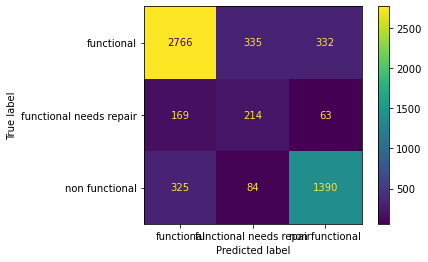

In [282]:
conf_matrix = plot_confusion_matrix(grid6.best_estimator_, df_dic['X_test_data_all'], df_dic['y_test_data_all'])

#### Grid Search #4 with SMOTENC

In [283]:
params7 = {}
params7['forest__n_estimators'] = [100, 500, 750]
params7['forest__max_depth'] = [30, 50, 70]
params7['forest__min_samples_split'] = [2, 10]
params7['forest__max_features'] = ['sqrt', 'log2']
params7['forest__class_weight'] = ['balanced', {'functional':1, 'functional needs repair':3, 'non functional': 2}]

grid7 = GridSearchCV(forest_pipe, param_grid=params7, scoring='recall_weighted', cv=3, n_jobs=-3, verbose=3)

grid7.fit(X_train_smote_rs, y_train_smote_rs)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-3)]: Done 116 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-3)]: Done 216 out of 216 | elapsed: 85.3min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('grab_num',
                                                                                          FunctionTransformer(func=<function grab_numeric at 0x7fa366ed3700>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
       'population', 'scheme_management', 'permit', 'extracti...
      dtype='object'))])),
                                       ('forest', RandomForestClassifier())]),
             n_jobs=-3,
             param_gri

In [285]:
grid7.best_params_

{'forest__class_weight': 'balanced',
 'forest__max_depth': 50,
 'forest__max_features': 'sqrt',
 'forest__min_samples_split': 10,
 'forest__n_estimators': 750}

In [286]:
grid7.best_score_

0.859180900621118

In [287]:
classification_report(df_dic['y_test_data_all'], grid7.best_estimator_.predict(df_dic['X_test_data_all']), output_dict=True)

{'functional': {'precision': 0.8500608272506083,
  'recall': 0.8141567142441014,
  'f1-score': 0.8317214700193424,
  'support': 3433},
 'functional needs repair': {'precision': 0.3305921052631579,
  'recall': 0.45067264573991034,
  'f1-score': 0.38140417457305503,
  'support': 446},
 'non functional': {'precision': 0.7850729517396184,
  'recall': 0.7776542523624236,
  'f1-score': 0.7813459927394582,
  'support': 1799},
 'accuracy': 0.7740401549841494,
 'macro avg': {'precision': 0.6552419614177949,
  'recall': 0.680827870782145,
  'f1-score': 0.6648238791106186,
  'support': 5678},
 'weighted avg': {'precision': 0.7886666324547871,
  'recall': 0.7740401549841494,
  'f1-score': 0.7803887829119883,
  'support': 5678}}

### SMOTE

In [72]:
# making list of categorical variables
smote_cat_cols = list(grab_categorical(df_dic['X_train_data_all']).columns)
smote_cat_cols

['funder',
 'installer',
 'basin',
 'region',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type_class',
 'management',
 'payment',
 'quality_group',
 'quantity',
 'source',
 'waterpoint_type_group']

In [73]:
# gets index nuber for columns to use to instantiatin SMOTENC
smote_cat_index = [df_dic['X_train_data_all'].columns.get_loc(c) for c in smote_cat_cols]

In [74]:
smtnc = SMOTENC(smote_cat_index, sampling_strategy='auto')

In [75]:
X_train_smote_rs, y_train_smote_rs = smtnc.fit_resample(df_dic['X_train_data_all'], df_dic['y_train_data_all'])

In [76]:
y_train_smote_rs.value_counts()

non functional             10303
functional                 10303
functional needs repair    10303
Name: status_group, dtype: int64

In [77]:
df_dic['y_train_data_all'].value_counts()

functional                 10303
non functional              5466
functional needs repair     1263
Name: status_group, dtype: int64

### Dummy Model

In [134]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(df_dic['X_train_data_all'], df_dic['y_train_data_all'])
dummy_clf.score(df_dic['X_train_data_all'], df_dic['y_train_data_all'])

0.6030413339596055

In [136]:
y_pred = dummy_clf.predict(df_dic['X_train_data_all'])
recall = recall_score(df_dic['y_train_data_all'], y_pred, average='weighted')
recall

0.6030413339596055

In [138]:
precision = precision_score(df_dic['y_train_data_all'], y_pred, average='weighted')
precision

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3636588504637804

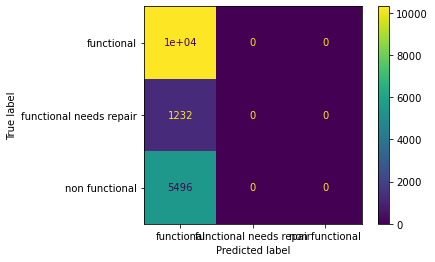

In [281]:
conf_matrix = plot_confusion_matrix(dummy_clf, df_dic['X_train_data_all'], df_dic['y_train_data_all'])

### Visuals for Presentation

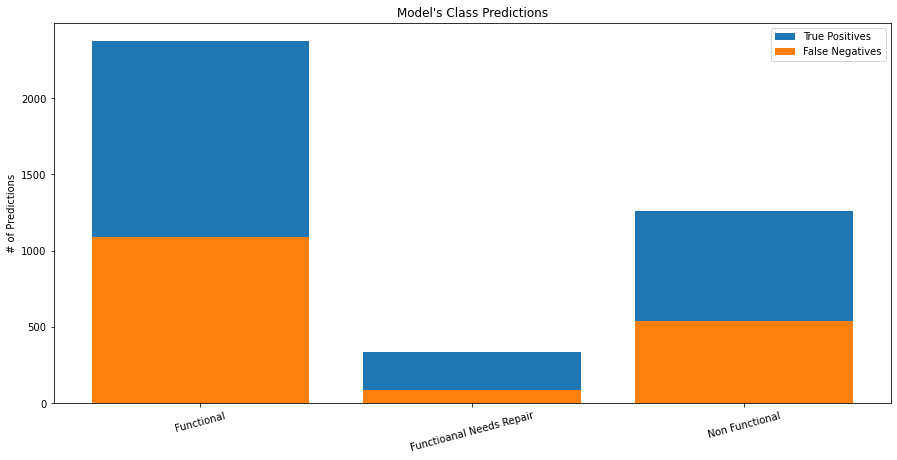

<Figure size 432x288 with 0 Axes>

In [87]:
labels = ["Functional", "Functioanal Needs Repair", "Non Functional"]

true_pos= [2376, 334, 1263]
false_neg = [1087, 88, 540]


fig, ax = plt.subplots(figsize=(15, 7))

ax.bar(labels, true_pos, label='True Positives')
ax.bar(labels, false_neg, label='False Negatives')

ax.set_ylabel('# of Predictions')
#ax.set_xlabel('Pedicted Class')

ax.set_title("Model's Class Predictions")
ax.legend()


plt.xticks(rotation=15)
plt.show()

plt.savefig('../images/Model_Prediction_Stack_Bar', transparent=False)